# Exploratory Data Analysis

# Introduction

In this document, we survey the data from NLSY '79. We also give an example of exploratory data analysis.

Many factors effect a person's income over a period of years. Of course, someone's chosen profession is the principle factor. Related to this factor is level of education, since many high-paying professions require a college degree or an additional professional degree. Other factors effecting income may be due to social biases concerning gender or race. We will explore the data and formulate hypotheses concerning the effect on income of some combination of education and physical characteristics for respondents to NLSY '79. 

# Description of the data

The NLSY79 is a nationally representative sample of 12,686 young men and women who were 14-22 years old when they were first surveyed in 1979. These individuals were interviewed annually through 1994 and are currently interviewed on a biennial basis. Since their first interview, many of the respondents have made transitions from school to work, and from their parents' homes to being parents and homeowners. These data provide researchers an opportunity to study a large sample that represents American men and women born in the 1950s and 1960s, and living in the United States in 1979.

We have downloaded and tidied the following datasets containing additional data. 

More info on the survey can be found here:
https://www.bls.gov/nls/y79summary.htm

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

## Income

Load and examine the income data as follows.


In [4]:
income_data = pd.read_csv('./data/income_data_nlsy79.csv',usecols=['CASEID','income','year'])

In [6]:
income_data.head()

,CASEID,income,year
0,1,NaN,1982
1,2,10000.0,1982
2,3,7000.0,1982
3,4,1086.0,1982
4,5,2300.0,1982


In [7]:
#The integer `CASEID` codes the individual respondents. The number of respondents is found as follows.

len(income_data['CASEID'].unique())


12686

In [17]:
#The integer `year` variable refers to the year the data was collected. The years for which we have data are revealed by:

income_data['year'].unique()


array([1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014], dtype=int64)

In [18]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291778 entries, 0 to 291777
Data columns (total 3 columns):
CASEID    291778 non-null int64
income    206150 non-null float64
year      291778 non-null int64
dtypes: float64(1), int64(2)
memory usage: 6.7 MB


In [19]:
#income_data.groupby('year').count()

In all, we have 23 years of data from 1982 to 2014. Surveys were taken every year between 1982 and 1994, and every other year afterwards.

In [20]:
print(income_data.count())
income_data.isnull().sum()

CASEID    291778
income    206150
year      291778
dtype: int64


CASEID        0
income    85628
year          0
dtype: int64

In [11]:
income_data.describe()

,CASEID,income,year
count,291778.000000,206150.000000,291778.000000
mean,6343.500000,19866.614194,1995.391304
std,3662.139022,30442.170340,9.658260
min,1.000000,0.000000,1982.000000
25%,3172.000000,1344.000000,1987.000000
50%,6343.500000,12000.000000,1993.000000
75%,9515.000000,26000.000000,2004.000000
max,12686.000000,370314.000000,2014.000000



### Truncation of income data

The variable 'income' refers to the respondent's reported annual salary, with an important exception. In each survey year, the highest 2% of incomes were collected and all persons in this group were assigned the minimum income for this group. The effect is that in each year, there will be about 2% of persons with the same high salary. For example, in 2014, this highest income is $370,314. This process is known as truncation, and helps to avoid distortion of summary statistics about groups of respondents due to a few very high numbers. In your exploratory analysis of traits effecting income you may or may not want to exclude these extreme values. Just be certain to document what you are doing. 


## Education

Load and examine the education data as follows.


In [21]:
education_data = pd.read_csv('./data/education_data_nlsy79.csv',usecols=['CASEID','education','year'])

In [22]:
education_data.head()

,CASEID,education,year
0,1,12.0,1979
1,2,9.0,1979
2,3,10.0,1979
3,4,9.0,1979
4,5,13.0,1979


In [23]:
#CASEID and year are as described for income.  
#We have the same number of unique respondants.
print(len(education_data['CASEID'].unique()))

12686


In [24]:
#we have data for the following years
education_data['year'].unique()

array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1996, 1998, 2000, 2002, 2004, 2006,
       2008, 2010, 2012, 2014], dtype=int64)

The variable that is reported here as 'education' is the one on the survey described as "highest grade completed as of May 1 of survey year". So, this is a cummulative accounting of the achieved level of education. The possible values are:


In [25]:
education_data['education'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  95.,
        nan])

The codebook at the survey site gives us more help in interpreting these numbers. A high school education is grade 12, four years of college is grade 16, 4 years or more of postgraduate education is coded as grade 20. The code 95 refers to some "ungraded" education (this is rare).   

When analyzing features of education you may want to create a factor expressing a natural level of achievement, such as "High School Graduate", "College Graduate", etc. The choice of using the years of education variable or a factor is yours.   

## Physical characteristics

Load the physical data as follows:

In [26]:
physical_data = pd.read_csv('./data/physical_data_nlsy79.csv',usecols=['CASEID','weight','year','eyes','hair','race','sex','height','BMI'])

In [27]:
physical_data.head()

,CASEID,weight,year,eyes,hair,race,sex,height,BMI
0,1,NaN,1981,NaN,NaN,NBNH,female,65.0,NaN
1,2,120.0,1981,hazel,light brown,NBNH,female,62.0,21.948431
2,3,NaN,1981,blue,blond,NBNH,female,NaN,NaN
3,4,110.0,1981,blue,light brown,NBNH,female,67.0,17.228549
4,5,130.0,1981,NaN,NaN,NBNH,male,63.0,23.028617


We have many traits reported here. 'eyes', 'hair', 'race', 'sex' were collected at the start of the survey and not updated afterwards. However, we repeated these values each year for convenience. The possible values are:

In [28]:
physical_data['eyes'].unique()

array([nan, 'hazel', 'blue', 'brown', 'green', 'light brown', 'other',
       'black', 'light blue', 'grey'], dtype=object)

In [29]:
physical_data['hair'].unique()

array([nan, 'light brown', 'blond', 'brown', 'black', 'red', 'light blond',
       'grey'], dtype=object)

In [30]:
physical_data['race'].unique()

array(['NBNH', 'hispanic', 'black'], dtype=object)


NBNH means not black or Hispanic. 

In [31]:
physical_data['sex'].unique()

array(['female', 'male'], dtype=object)

The height and weight data are given in integers, height in inches and weight in pounds. The height data was prepared as you did in Part A of the project. One complication is that height and weight were not updated each survey year. To discover the years for which we have such data, identify the years with non-NaN weight and height data as follows:


In [32]:
physical_data[~physical_data['height'].isnull()]['year'].unique()

array([1981, 1982, 1985, 2006, 2008, 2010, 2012, 2014], dtype=int64)

In [33]:
physical_data[~physical_data['weight'].isnull()]['year'].unique()

array([1981, 1982, 1985, 1986, 1988, 1989, 1990, 1992, 1993, 1994, 1996,
       1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014], dtype=int64)

While weight appears to have been recorded for multiple years in which height was not recorded (1986 - 2004), this data must be used cautiously. Examination of the numbers of non-NA weight readings per year shows that weight was collected on only a small number of respondents in these years. We recommend only using weight data for the same years in which height data was surveyed.  

For convenience, we computed 'BMI' and added this to the data frame of physical characteristics. Of course, this is only available for years in which both height and weight were recorded. 


# Factors effecting years of education: an example of EDA

Following is an example of EDA along the lines we expect you to perform.

## Plan and scope for the analysis

Our objective is to explore factors that effect the number of years of education achieved. Income level is likely a consequence of years of education, so correlations between those two are best analyzed when income is the objective -- this is for you to do. Thus, we'll only analyze the effects of physical characteristics on years of education. Because years of education is a cumulative measure, we choose to restrict our analysis to data from 2014. For our analysis, we choose the following objective.

**Our analysis will be to study effects of race and gender on years of education in the 2014 data** 

This is only one of many possible objectives for studying educational features of these respondents.
There are many related aspects of education that could be analyzed under this general objective. For example, rather than simply consider the maximum grade finally achieved, another informative objective could be to analyze the number of years it takes to obtain a college degree. We chose one objective to provide a focus to our efforts.

Moreover, we could also choose to explore the effects of height, weight and BMI on years of education. In this case we would need to consider the values of these measures during the years in which the respondents were in school to gauge any causative effect. 



## Join the data

Our analysis concerns education and physical characteristics in 2014, so we join the relevant datasets and restrict the year.

In [36]:
education_data_2014 = education_data[education_data['year']==2014]
physical_data_2014 = physical_data[physical_data['year']==2014] 
print(len(education_data_2014))
len(physical_data_2014)

12686


12686

In [37]:
educ_phys_2014 = pd.merge(education_data_2014,physical_data_2014,left_on=['CASEID','year'],right_on=['CASEID','year'],how='inner')

In [38]:
educ_phys_2014.head()

,CASEID,education,year,weight,eyes,hair,race,sex,height,BMI
0,1,NaN,2014,NaN,NaN,NaN,NBNH,female,NaN,NaN
1,2,12.0,2014,151.0,hazel,light brown,NBNH,female,60.0,29.490359
2,3,10.0,2014,160.0,blue,blond,NBNH,female,70.0,22.957760
3,4,NaN,2014,NaN,blue,light brown,NBNH,female,NaN,NaN
4,5,NaN,2014,NaN,NaN,NaN,NBNH,male,NaN,NaN


In [39]:
len(educ_phys_2014)

12686

## Exploration of the education variable

Education is an integer variable with a limited number of possible values. The simplest way to study the distribution is with a bar plot, as follows.

(array([   24.,    36.,   129.,   833.,  3292.,  1073.,  1413.,   257.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     8.]),
 array([  2.   ,   4.325,   6.65 ,   8.975,  11.3  ,  13.625,  15.95 ,
         18.275,  20.6  ,  22.925,  25.25 ,  27.575,  29.9  ,  32.225,
         34.55 ,  36.875,  39.2  ,  41.525,  43.85 ,  46.175,  48.5  ,
         50.825,  53.15 ,  55.475,  57.8  ,  60.125,  62.45 ,  64.775,
         67.1  ,  69.425,  71.75 ,  74.075,  76.4  ,  78.725,  81.05 ,
         83.375,  85.7  ,  88.025,  90.35 ,  92.675,  95.   ]),
 <a list of 40 Patch objects>)

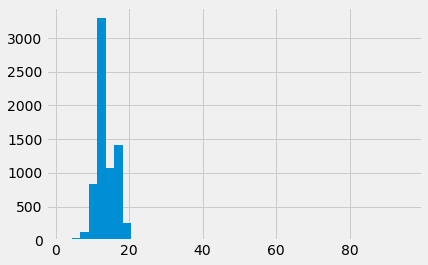

In [42]:
figure, axes = plt.subplots()

axes.hist(educ_phys_2014.education.dropna(),bins = 40)



(array([   60.,   962.,  4365.,  1670.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     8.]),
 array([  2.  ,   6.65,  11.3 ,  15.95,  20.6 ,  25.25,  29.9 ,  34.55,
         39.2 ,  43.85,  48.5 ,  53.15,  57.8 ,  62.45,  67.1 ,  71.75,
         76.4 ,  81.05,  85.7 ,  90.35,  95.  ]),
 <a list of 20 Patch objects>)

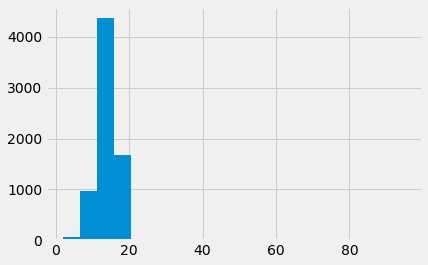

In [41]:
#to zero in on 95 adjust range
figure, axes = plt.subplots()


axes.hist(educ_phys_2014.education.dropna(),bins=20)


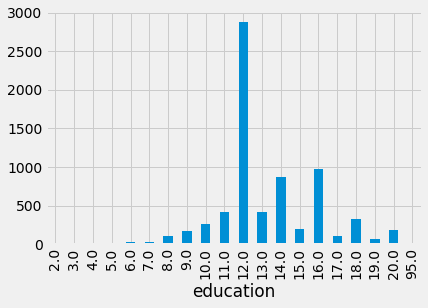

In [43]:
#also could do bar graph
educ_phys_2014[['CASEID','education']].groupby('education').CASEID.nunique().plot(kind='bar')

This plot reveals the spurious value, 95, meaning some ungraded education. We'll exclude these from the analysis. Clearly, there are few of these values in the data.

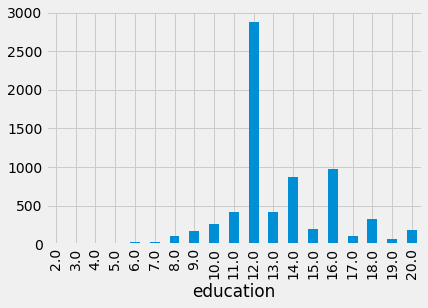

In [44]:
educ_phys_2014[educ_phys_2014['education']<95][['CASEID','education']].groupby('education').CASEID.nunique().plot(kind='bar')

There are bumps in the distribution at 12 and 16 years as expected, and also 14 years, perhaps for associate degrees, and 18 years for an MBA or other 2-year master's degree.

In how many cases is educational data non-missing?

In [46]:
print(sum(educ_phys_2014['education'].isnull()))
sum(educ_phys_2014['education'].notnull())

5621


7065

There are over 12,000 cases in all, so education is missing in many cases. However, 7000 is still a large number to study. Note that when you filter education data by `education < 95`, it also removes records with NaN values. 


There do not appear to be any additional anomalies in the education data that could represent erroneous values.


## Study of gender

Let's plot sex to examine the distribution.

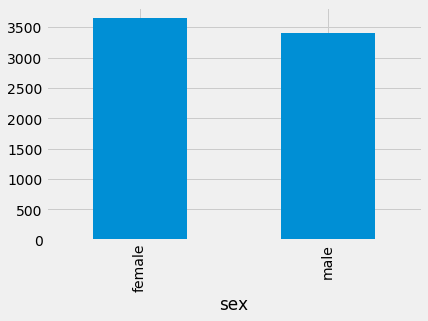

In [47]:
educ_phys_2014[educ_phys_2014['education']<95][['CASEID','sex']].groupby('sex').CASEID.nunique().plot(kind='bar')

In [48]:
#The numbers of males and females are comparable.

educ_phys_2014[educ_phys_2014['education']<95].groupby('sex')['CASEID'].count()



sex
female    3658
male      3399
Name: CASEID, dtype: int64

In [49]:
#There are no missing values.
sum(educ_phys_2014[educ_phys_2014['education']<95]['sex'].isnull())

0

## Study of race

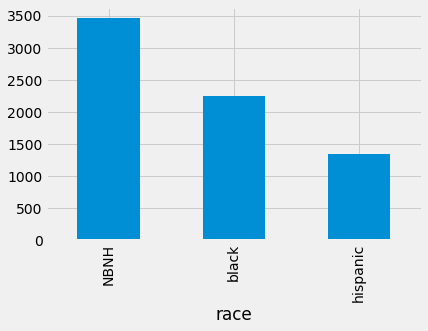

In [50]:
educ_phys_2014[educ_phys_2014['education']<95][['CASEID','race']].groupby('race').CASEID.nunique().plot(kind='bar')


This shows that in each racial group we have over 1200 respondents. This is a high enough sample size for meaningful analysis.

In [51]:
#No mising values
sum(educ_phys_2014[educ_phys_2014['education']<95]['race'].isnull())

0

## Explore the effects of sex on years of education

We'll use a series of plots to get insight into this relationship. Sex is a categorical variable and years of education an integer that can take on many values, so we'll first try a boxplot. 


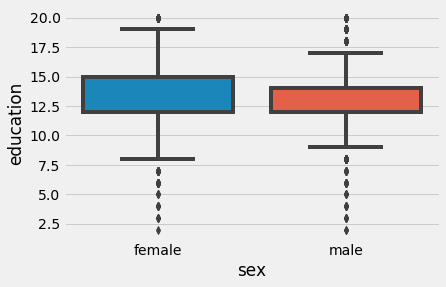

In [52]:
import seaborn as sns

sns.boxplot(educ_phys_2014[educ_phys_2014['education']<95].sex,educ_phys_2014[educ_phys_2014['education']<95].education)



The discrete nature of this integer education variable leads to irregularities in the boxplots. For example, it appears that the medians in both genders is at 12, which is also the 1st quartile. It does appear that the third quartile for females is higher than that for males. 

For an analysis that provides more granularity, we plot bar plots faceted by gender.

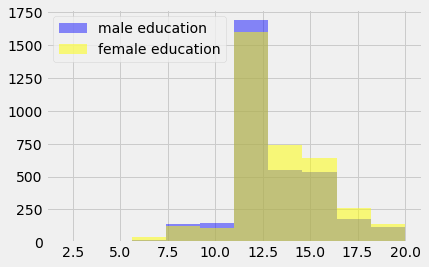

In [53]:
#to make things easier we're going to create dataframe df that has education filtered to only include values < 95
df = educ_phys_2014[educ_phys_2014['education']<95]

figures, axes = plt.subplots()

axes.hist(df[df['sex']=='male'].education,color='blue',alpha=0.45,label='male education')
axes.hist(df[df['sex']=='female'].education,color='yellow',alpha=0.5,label='female education')
axes.legend()

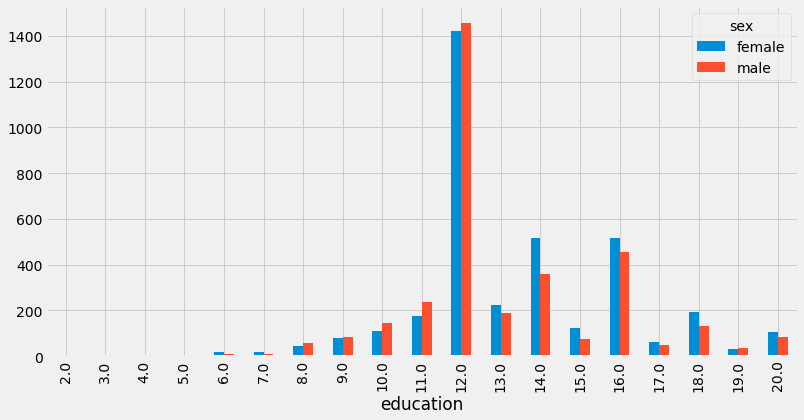

In [54]:
df[['education','sex','CASEID']].groupby(['education','sex']).CASEID.nunique().unstack().plot(kind='bar',figsize=(12,6))

This histogram suggests that more females than males obtain college degrees and associate degrees (14 years of education). The numbers of high school graduates appear nearly the same for males and females.

## Education and race

Let's use a faceted plot, as we did with sex.

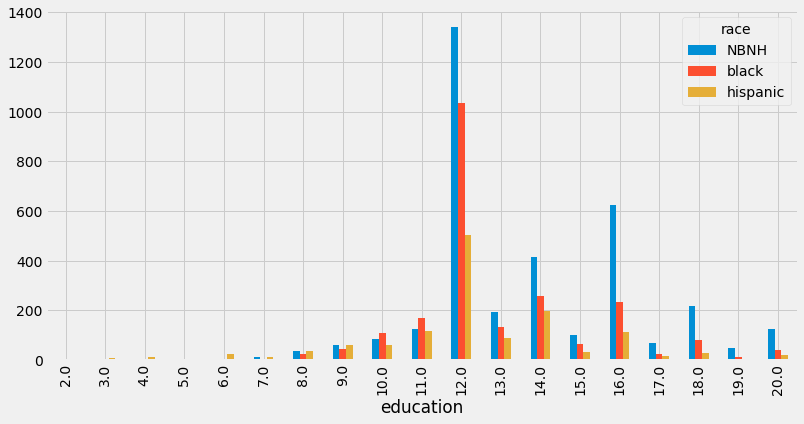

In [61]:
df[['education','race','CASEID']].groupby(['education','race']).CASEID.nunique().unstack().plot(kind='bar',figsize=(12,6))

These are difficult to analyze comparatively because of the differences in raw numbers of respondents in each racial group. We're more interested in the proportions of respondents at each educational level. Googling for how to do this reveals the correct adjustment to the aesthetics.

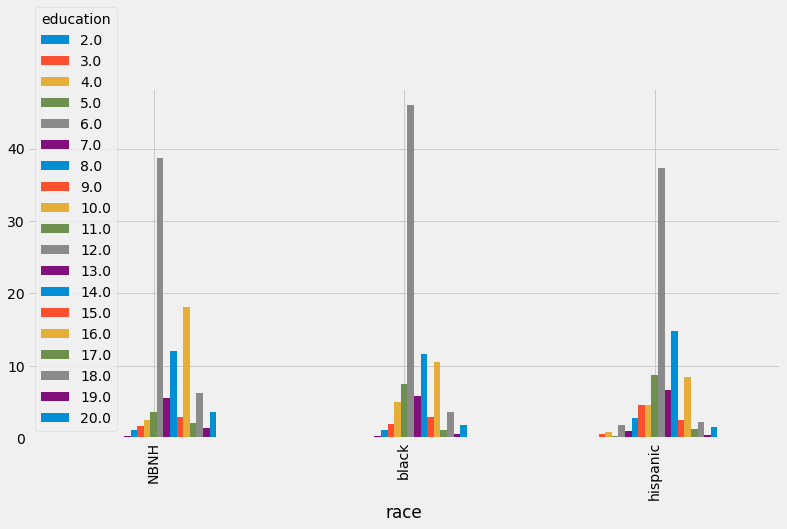

In [64]:
group_1 = df[['education','race','CASEID']].groupby(['race','education']).CASEID.nunique()
group_2 = group_1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

#print(group_1)
#group_2
group_2.unstack().plot(kind='bar',figsize=(12,6))

There is certainly racial disparity in years of education at all levels from high school and beyond, With highest proportions for NBNH, then blacks and then Hispanics.

## Combined effects of gender and race on years of education

We have seen that both gender and race have some effect on the number of years of education. To deepen our understanding we would like to know if the effect of gender on years of education is the same for each race. It is challenging to make such a comparison in plots such as these. Multiple plots on different subsets of data may be necessary. In your own work, it may take several attempts to find the most informative plot or plots.

Below, we study the relationship between years of education and gender, separately for each racial group. 

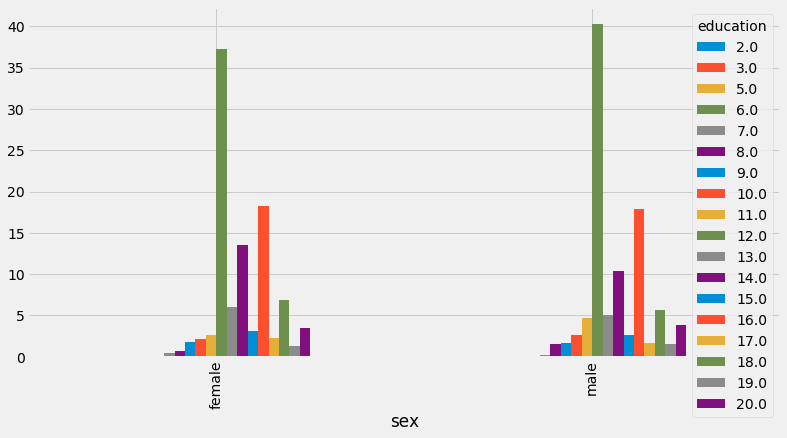

In [67]:
nbnh = df[df['race']=='NBNH']
group_1 = nbnh[['education','sex','CASEID']].groupby(['sex','education']).CASEID.nunique()
group_2 = group_1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
#print(group_1)
group_2.unstack().plot(kind='bar',figsize=(12,6))

There appear to be a slightly higher proportion of females at years above a high school diploma.

To set the focus on the education level at which we see some potential disparity, we further subset to education level above 12 years. Redo the above plot for this group.

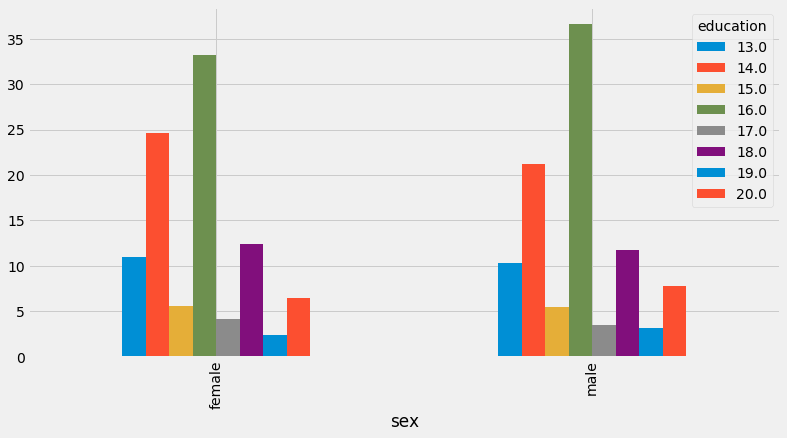

In [70]:
nbnh = df[(df['race']=='NBNH') & (df['education'] > 12)]
group_1 = nbnh[['education','sex','CASEID']].groupby(['sex','education']).CASEID.nunique()
group_2 = group_1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

group_2.unstack().plot(kind='bar',figsize=(12,6))

There is a slightly higher proportion of females getting college and associates degrees.

Here is the plot for Blacks.

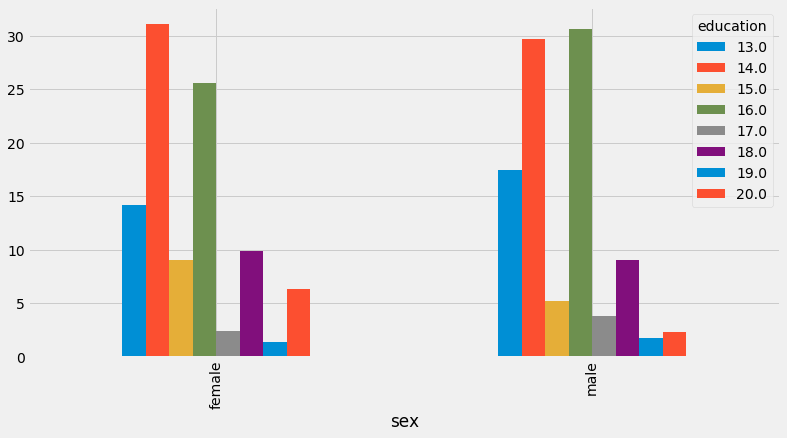

In [69]:
black = df[(df['race']=='black') & (df['education'] > 12)]
group_1 = black[['education','sex','CASEID']].groupby(['sex','education']).CASEID.nunique()
group_2 = group_1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

group_2.unstack().plot(kind='bar',figsize=(12,6))

There is a similar gender disparity here, which may be slightly greater than for NBNH persons at the associates level and the post-graduate level.

Now plot the data for Hispanics.

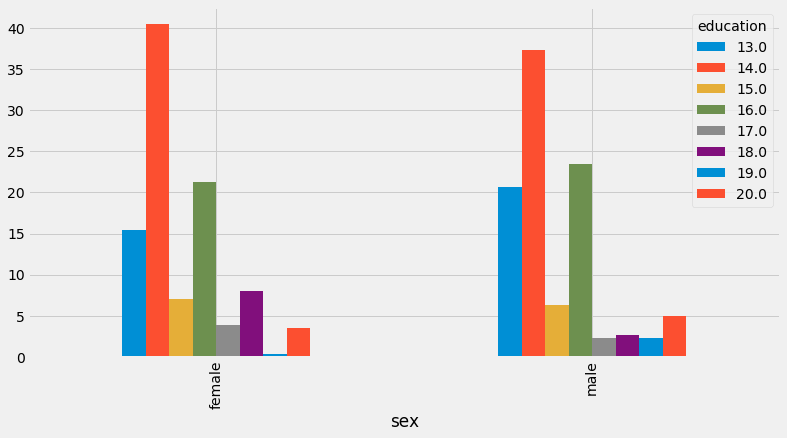

In [68]:
hisp = df[(df['race']=='hispanic') & (df['education'] > 12)]
group_1 = hisp[['education','sex','CASEID']].groupby(['sex','education']).CASEID.nunique()
group_2 = group_1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

group_2.unstack().plot(kind='bar',figsize=(12,6))

We have similar features here; perhaps less pronounced than in Black persons. 

## Grouped analysis of summary statistics 

Exploratory data analysis involves inspection of numeric measures as well as visualization. Analysis of statistical significance of some of the disparities illustrated above requires statistical tests you will learn later. However, we can compute some summary statistics of years of education for groups of individuals. As the summary statistic we use the mean. 


### Mean years of education by gender

These are the means without consideration of race.

In [83]:
df.groupby('sex').education.mean()

sex
female    13.395025
male      13.078258
Name: education, dtype: float64

There is a slight increase here. 

### Mean years of education by race

In [84]:
df.groupby('race').education.mean()

race
NBNH        13.768120
black       12.940757
hispanic    12.395107
Name: education, dtype: float64

These differences are fairly large.

### Mean years of education by race and gender

Here we consider both race and sex in the grouped summary.

In [85]:
df.groupby(['race','sex']).education.mean()

race      sex   
NBNH      female    13.875561
          male      13.653961
black     female    13.205281
          male      12.650794
hispanic  female    12.488571
          male      12.294299
Name: education, dtype: float64

The gender difference is positive for all races, and greatest for blacks. 

### Proportion with more than 12 years education by race and gender

First consider race alone. This is data that reflects the last group of plots.

In [114]:
group_1 = df[df['education']>12].groupby('race').agg({'CASEID':'nunique'})
group_2 = df.groupby('race').agg({'CASEID':'nunique'})

print(group_1)
print(group_2)

group_1 / group_2

          CASEID
race            
NBNH        1799
black        850
hispanic     508
          CASEID
race            
NBNH        3463
black       2245
hispanic    1349


,CASEID
race,
NBNH,0.519492
black,0.378619
hispanic,0.376575



Now analyze race and sex together.

In [116]:
group_1 = df[df['education']>12].groupby(['race','sex']).agg({'CASEID':'nunique'})
group_2 = df.groupby(['race','sex']).agg({'CASEID':'nunique'})

print(group_1)
print(group_2)

group_1 / group_2

                 CASEID
race     sex           
NBNH     female     981
         male       818
black    female     507
         male       343
hispanic female     286
         male       222
                 CASEID
race     sex           
NBNH     female    1784
         male      1679
black    female    1174
         male      1071
hispanic female     700
         male       649


CASEID
race     sex             
NBNH     female  0.549888
         male    0.487195
black    female  0.431857
         male    0.320261
hispanic female  0.408571
         male    0.342065

Among NBNH and Hispanics, about 6% more females than males have education over 12 years. For blacks the difference in percentage is 11%. 


## Hypotheses for further analysis

Based on the plots and the grouped summary analyses we state the following hypotheses.

1. The mean years of education is greater for females than males;
2. The mean years of education shows racial disparity, with NBNH persons having the highest number, followed by Blacks, followed by Hispanics;
3. The proportion of persons having education beyond 12 years shows a high degree of racial disparity, with much greater proportion of NBNH persons having such education and Blacks and Hispanics having comparable proportions at a much lower level. 
4. The proportion of persons having education beyond 12 years shows gender disparity that depends on race. The difference in proportion of females compared to males appears to be significantly greater in Blacks than NBNH and Hispanic races. 

Testing the statistical significance of these hypotheses requires statistical analyses to be learned later.



